In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [6]:
# Step 1: Load and Explore the Dataset
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
stock_data = yf.download(stock_tickers, start='2022-01-01', end='2023-01-01')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [7]:

# Display the first few rows of the dataset
print(stock_data.head())

                  AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2022-01-03  179.953903  170.404495  144.991501  328.727661  399.926666
2022-01-04  177.669983  167.522003  144.399506  323.090942  383.196655
2022-01-05  172.943970  164.356995  137.774994  310.688171  362.706665
2022-01-06  170.056992  163.253998  137.747498  308.233154  354.899994
2022-01-07  170.225037  162.554001  137.016998  308.390228  342.320007


In [19]:

# Step 2: Data Analysis - Calculate Daily Returns
daily_returns = stock_data.pct_change()

In [20]:

# Display basic statistics of daily returns
print(daily_returns.describe())

             AAPL        AMZN       GOOGL        MSFT        TSLA
count  250.000000  250.000000  250.000000  250.000000  250.000000
mean    -0.001074   -0.002329   -0.001689   -0.001049   -0.003847
std      0.022471    0.031571    0.024396    0.022289    0.041155
min     -0.058679   -0.140494   -0.091405   -0.077156   -0.121841
25%     -0.015816   -0.019864   -0.018165   -0.014975   -0.028600
50%     -0.001360   -0.002927   -0.002278   -0.001833   -0.001146
75%      0.013388    0.016305    0.013213    0.012852    0.019595
max      0.088975    0.135359    0.076557    0.082268    0.106776


In [21]:

# Step 3: Recommender System - Calculate Correlations
correlation_matrix = daily_returns.corr()

In [22]:
# Display the correlation matrix
print(correlation_matrix)

           AAPL      AMZN     GOOGL      MSFT      TSLA
AAPL   1.000000  0.695904  0.798268  0.824901  0.637218
AMZN   0.695904  1.000000  0.722229  0.741197  0.591533
GOOGL  0.798268  0.722229  1.000000  0.850336  0.561843
MSFT   0.824901  0.741197  0.850336  1.000000  0.563946
TSLA   0.637218  0.591533  0.561843  0.563946  1.000000


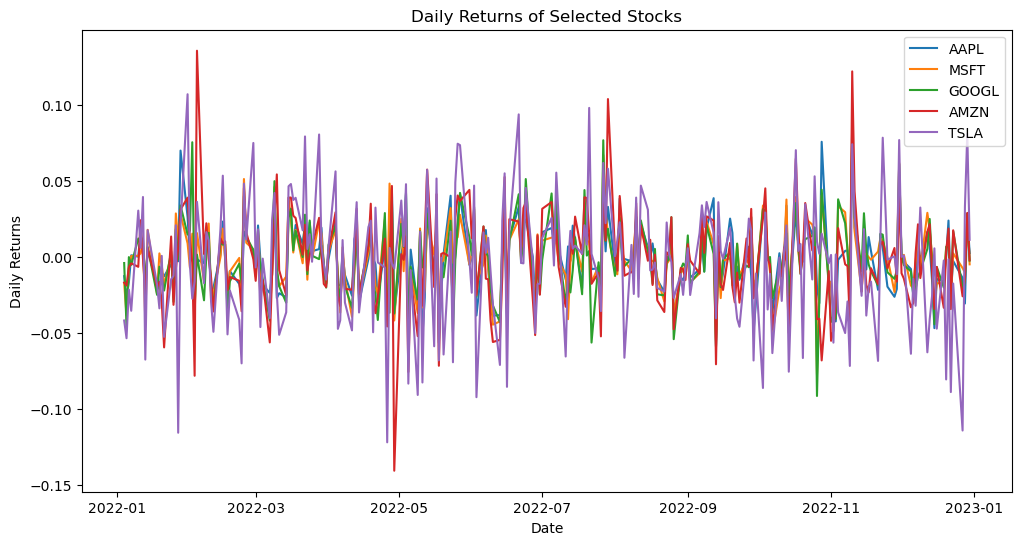

In [23]:
plt.figure(figsize=(12, 6))
for ticker in stock_tickers:
    sns.lineplot(data=daily_returns[ticker], label=ticker)

plt.title('Daily Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

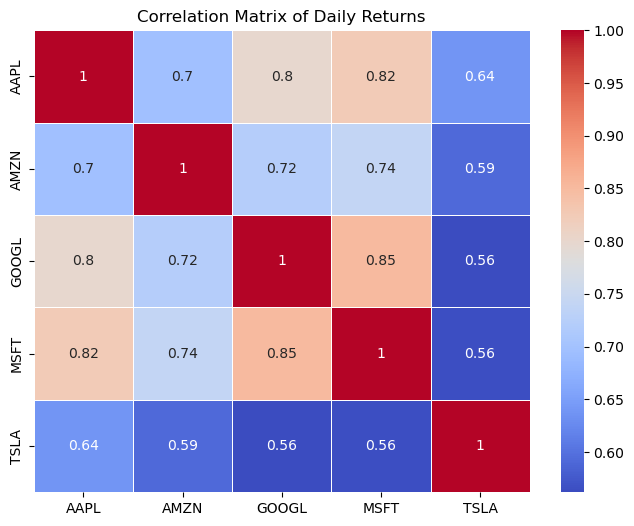

In [24]:
# Step 5: Visualize Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [27]:
# Step 6: Recommender System - Define Function to Get Top Correlated Stocks

def get_top_correlated_stocks(stock, n=3):
    correlated_stocks = correlation_matrix[stock].sort_values(ascending=False)[1:n+1]
    return correlated_stocks


In [28]:
# Step 7: Visualize Top Correlated Stocks
def plot_top_correlated_stocks(stock, n=3):
    top_correlated = get_top_correlated_stocks(stock, n)
    plt.figure(figsize=(10, 6))
    for correlated_stock in top_correlated.index:
        sns.lineplot(data=daily_returns[correlated_stock], label=correlated_stock)

    plt.title(f'Daily Returns of Top Correlated Stocks with {stock}')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.legend()
    plt.show()

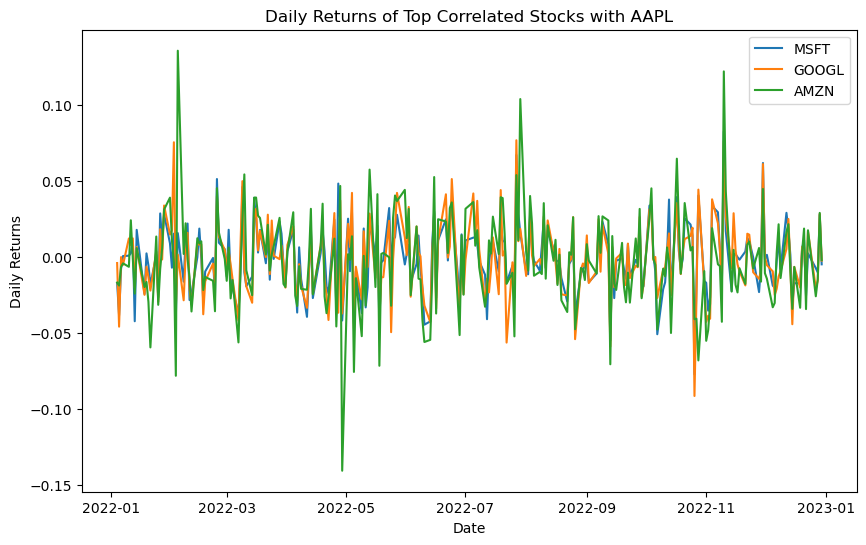

In [29]:

# Example: Visualize Top 3 Correlated Stocks with 'AAPL'
plot_top_correlated_stocks('AAPL', n=3)